In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\verma\Downloads\Netflix Dataset.csv")

In [3]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [4]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [5]:
print(df.isnull().sum())

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      98
Rating             7
Duration           0
Type               0
Description        0
Year              98
dtype: int64


In [6]:
df = df.dropna(subset=['Year'])

# Ensure Year is integer
df['Year'] = df['Year'].astype(int)

In [9]:
# Handle missing values in text columns
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Release_Date'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)
df['Duration'].fillna('Unknown', inplace=True)

print("✅ Missing values filled successfully!")

✅ Missing values filled successfully!


C:\Users\verma\AppData\Local\Temp\ipykernel_7932\1351410503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
C:\Users\verma\AppData\Local\Temp\ipykernel_7932\1351410503.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [10]:
print(df.isnull().sum())

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Year            0
dtype: int64


In [11]:
distribution = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)
distribution['Total'] = distribution.sum(axis=1)

In [12]:
print("Distribution of Movies vs. TV Shows Over the Years:")
print(distribution)

Distribution of Movies vs. TV Shows Over the Years:
Category  Movie  TV Show  Total
Year                           
2008          1        1      2
2009          2        0      2
2010          1        0      1
2011         13        0     13
2012          3        0      3
2013          6        4     10
2014         19        5     24
2015         58       21     79
2016        258      174    432
2017        864      337   1201
2018       1255      406   1661
2019       1498      639   2137
2020       1313      696   2009
2021         88       29    117


<Figure size 1200x600 with 0 Axes>

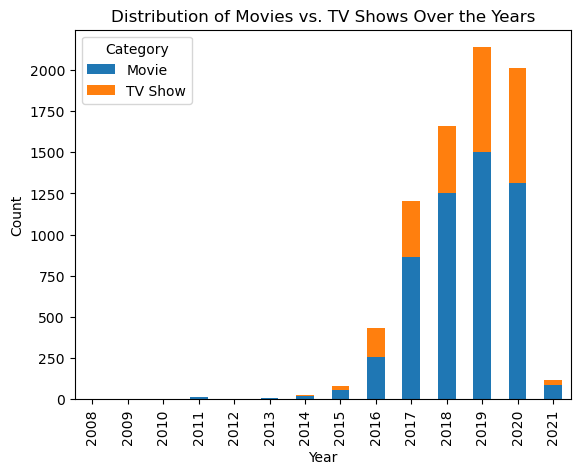

In [13]:
plt.figure(figsize=(12, 6))
distribution.drop('Total', axis=1).plot(kind='bar', stacked=True)
plt.title('Distribution of Movies vs. TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

In [14]:
movies_percentage = (distribution.get('Movie', 0) / distribution['Total'] * 100).round(1)
tv_percentage = (distribution.get('TV Show', 0) / distribution['Total'] * 100).round(1)
print("\nMovies Percentage Over Years:")
print(movies_percentage)
print("\nTV Shows Percentage Over Years:")
print(tv_percentage)


Movies Percentage Over Years:
Year
2008     50.0
2009    100.0
2010    100.0
2011    100.0
2012    100.0
2013     60.0
2014     79.2
2015     73.4
2016     59.7
2017     71.9
2018     75.6
2019     70.1
2020     65.4
2021     75.2
dtype: float64

TV Shows Percentage Over Years:
Year
2008    50.0
2009     0.0
2010     0.0
2011     0.0
2012     0.0
2013    40.0
2014    20.8
2015    26.6
2016    40.3
2017    28.1
2018    24.4
2019    29.9
2020    34.6
2021    24.8
dtype: float64


In [15]:
df['Genres'] = df['Type'].str.split(', ')

In [17]:
df.shape

(7691, 13)

In [18]:
exploded_genres = df.explode('Genres')

In [19]:
genre_counts = exploded_genres['Genres'].value_counts()
print("\nTop 10 Most Common Genres:")
print(genre_counts.head(10))


Top 10 Most Common Genres:
Genres
International Movies        2437
Dramas                      2108
Comedies                    1472
International TV Shows      1176
Documentaries                786
Action & Adventure           721
TV Dramas                    680
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64


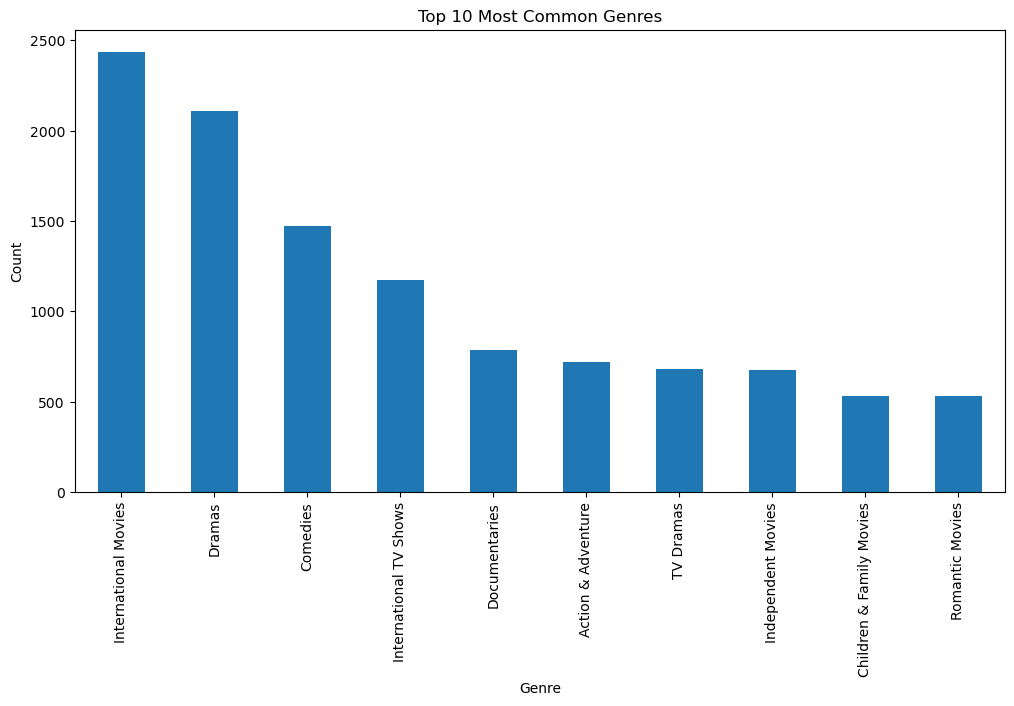

In [20]:
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [21]:
genres_over_years = exploded_genres.groupby(['Year', 'Genres']).size().unstack(fill_value=0)

In [23]:
top_genres = genre_counts.head(10).index
genres_over_years_top = genres_over_years[top_genres]
print("\nPopularity of Top Genres Over Years:")
print(genres_over_years_top)


Popularity of Top Genres Over Years:
Genres  International Movies  Dramas  Comedies  International TV Shows  \
Year                                                                     
2008                       0       1         0                       0   
2009                       1       1         0                       0   
2010                       0       0         0                       0   
2011                       1      13         0                       0   
2012                       0       0         2                       0   
2013                       0       0         1                       1   
2014                       2       0         2                       0   
2015                      10      12        12                       3   
2016                      85      67        49                      89   
2017                     418     297       191                     198   
2018                     677     534       301                     218   


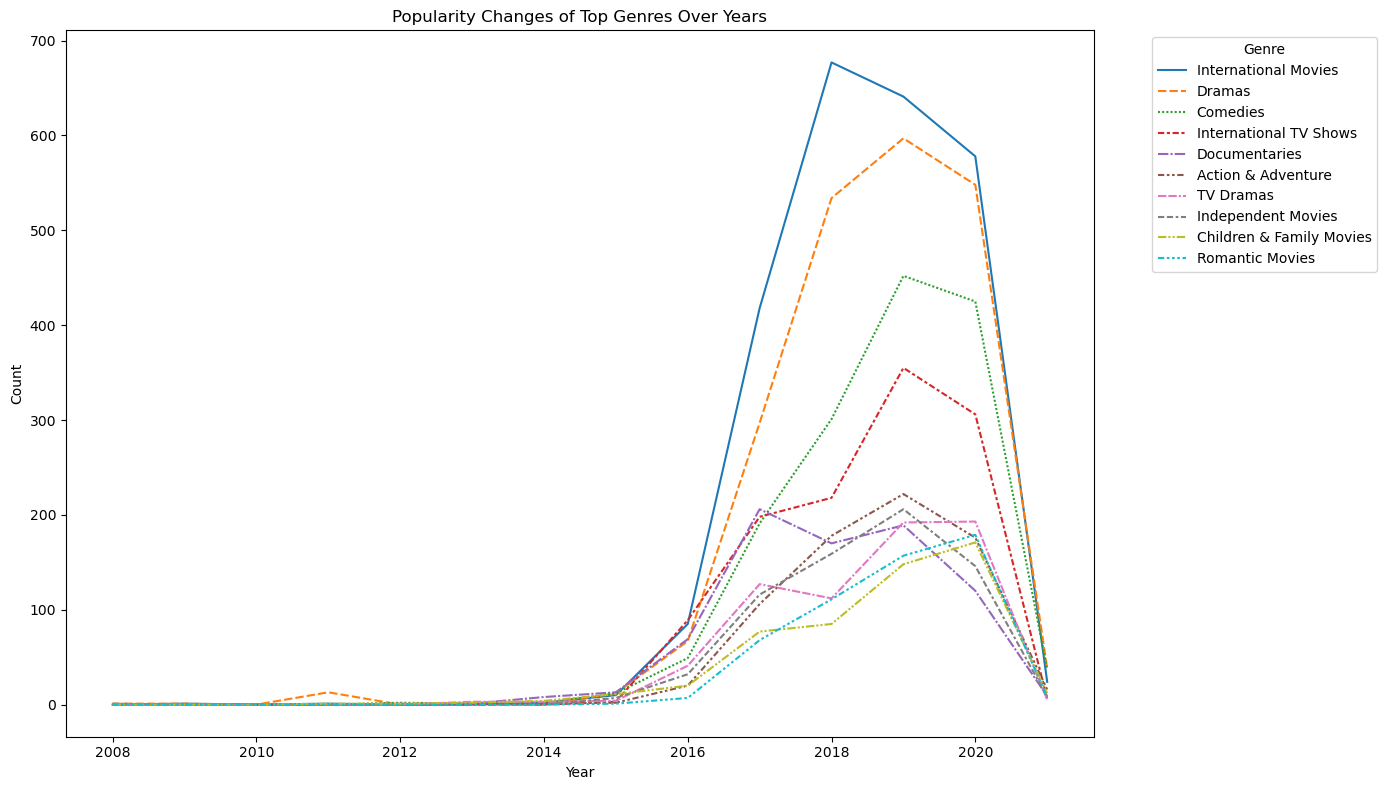

In [24]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=genres_over_years_top)
plt.title('Popularity Changes of Top Genres Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
df['Countries'] = df['Country'].str.split(', ')
exploded_countries = df.explode('Countries')

In [26]:
exploded_countries = exploded_countries[exploded_countries['Countries'].notna() & (exploded_countries['Countries'] != '')]

In [27]:
country_counts = exploded_countries['Countries'].value_counts()
print("\nTop 10 Countries by Title Count:")
print(country_counts.head(10))


Top 10 Countries by Title Count:
Countries
United States     3250
India              989
United Kingdom     703
Unknown            503
Canada             399
France             345
Japan              283
Spain              211
South Korea        207
Germany            198
Name: count, dtype: int64


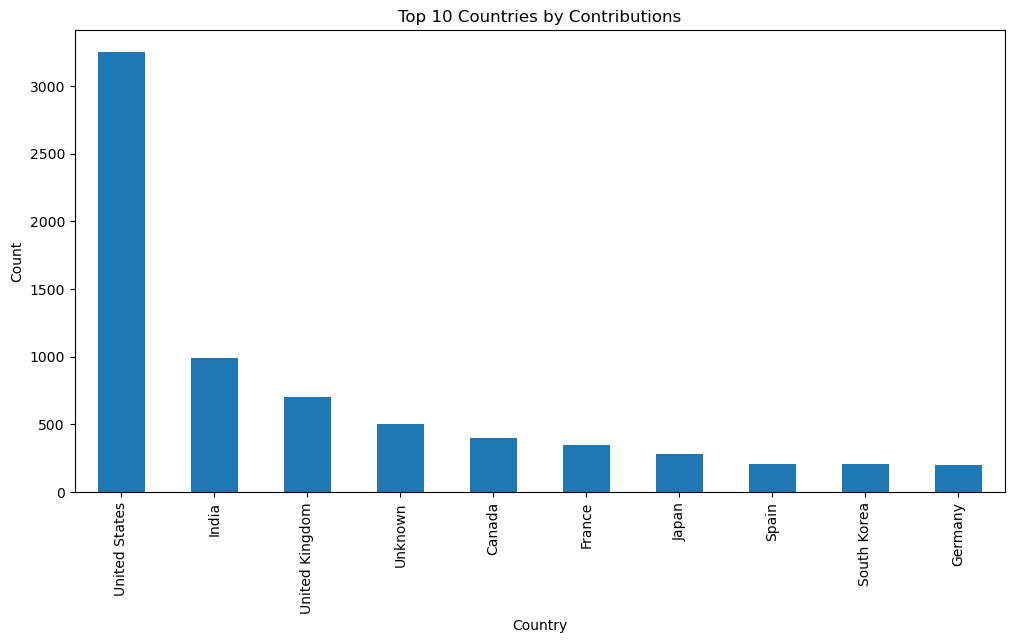

In [28]:
plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Contributions')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [29]:
countries_over_years = exploded_countries.groupby(['Year', 'Countries']).size().unstack(fill_value=0)
top_countries = country_counts.head(10).index
countries_over_years_top = countries_over_years[top_countries]

In [30]:
print("\nContributions of Top Countries Over Years:")
print(countries_over_years_top)


Contributions of Top Countries Over Years:
Countries  United States  India  United Kingdom  Unknown  Canada  France  \
Year                                                                       
2008                   2      0               0        0       0       0   
2009                   1      0               0        0       0       0   
2010                   1      0               0        0       0       0   
2011                  12      0               0        0       0       1   
2012                   3      0               0        0       0       0   
2013                   9      0               1        0       1       0   
2014                  22      0               2        0       4       0   
2015                  53      0               8        5       5       9   
2016                 197     14              52       19      28      29   
2017                 462    162             129       66      69      54   
2018                 604    356             

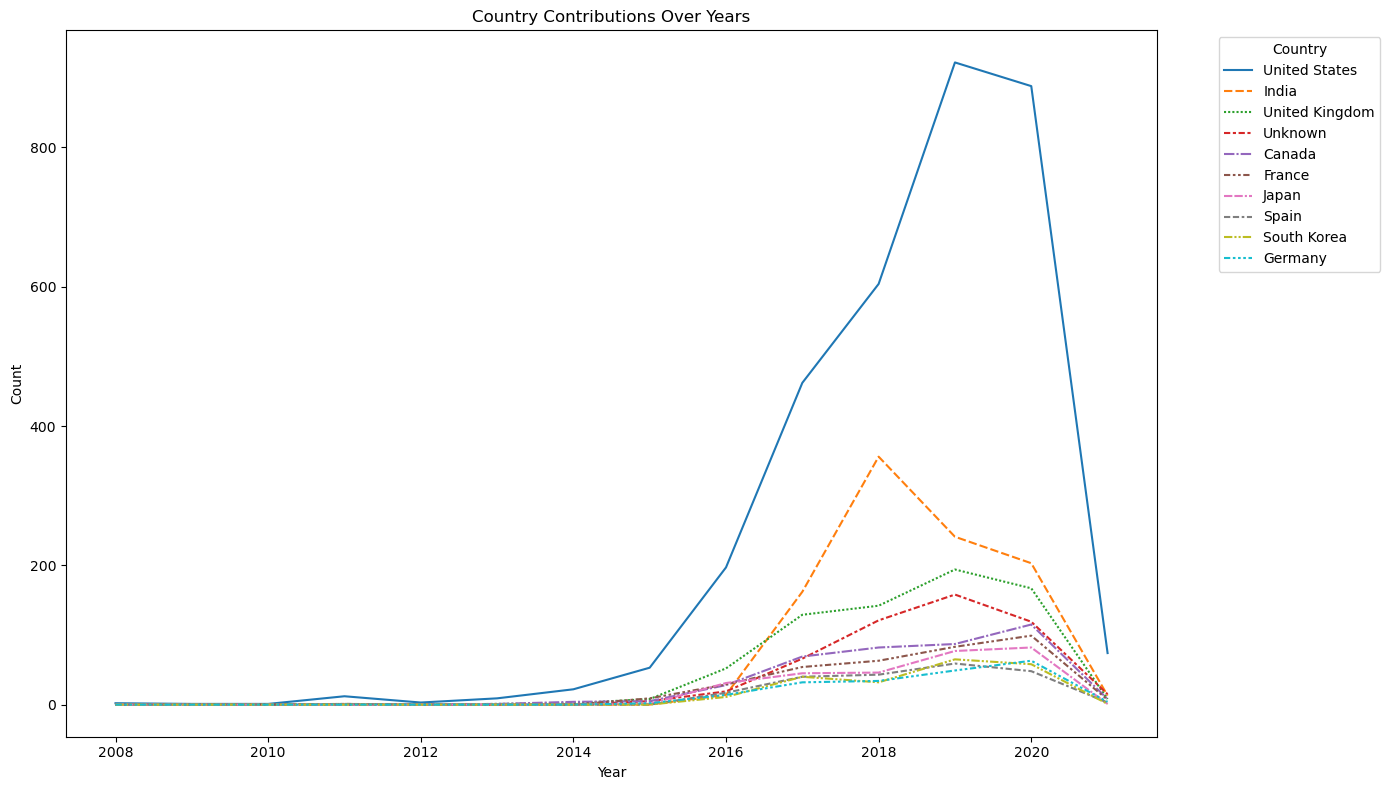

In [31]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=countries_over_years_top)
plt.title('Country Contributions Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

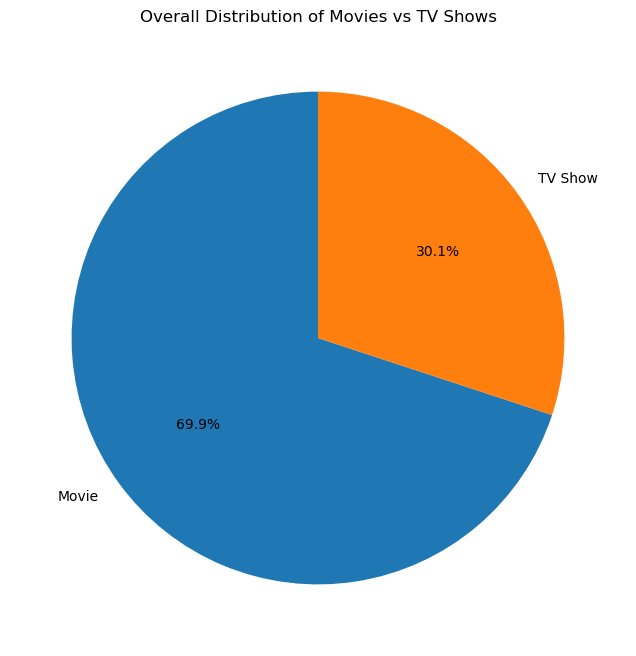

In [33]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Distribution of Movies vs TV Shows')
plt.show()

In [32]:
total_movies = distribution['Movie'].sum() if 'Movie' in distribution else 0
total_tv = distribution['TV Show'].sum() if 'TV Show' in distribution else 0
total = total_movies + total_tv

print("\nSummary Insights:")
print(f"Total Movies: {total_movies} ({(total_movies / total * 100):.1f}%)")
print(f"Total TV Shows: {total_tv} ({(total_tv / total * 100):.1f}%)")

print("\nTop Performing Genres:")
print(genre_counts.head(5))

print("\nTop Contributing Countries:")
print(country_counts.head(5))

print("\nStrategic Recommendations:")
print("- Increase investment in TV Shows as they show growing trends for user retention.")
print("- Focus on top genres like Dramas and International Movies for content acquisition.")
print("- Expand partnerships in high-growth countries like India and United Kingdom for diverse content.")
print("- Explore underrepresented genres and regions to fill catalog gaps and attract niche audiences.")


Summary Insights:
Total Movies: 5379 (69.9%)
Total TV Shows: 2312 (30.1%)

Top Performing Genres:
Genres
International Movies      2437
Dramas                    2108
Comedies                  1472
International TV Shows    1176
Documentaries              786
Name: count, dtype: int64

Top Contributing Countries:
Countries
United States     3250
India              989
United Kingdom     703
Unknown            503
Canada             399
Name: count, dtype: int64

Strategic Recommendations:
- Increase investment in TV Shows as they show growing trends for user retention.
- Focus on top genres like Dramas and International Movies for content acquisition.
- Expand partnerships in high-growth countries like India and United Kingdom for diverse content.
- Explore underrepresented genres and regions to fill catalog gaps and attract niche audiences.
